**Pre-processing data**


In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
# Mount Google Drive
drive.mount('/content/drive')

# Path ke file CSV di Google Drive
data_path = '/content/drive/MyDrive/RainfallsPrediction/data/raw/data1.csv'

# Memuat data dari file CSV
data = pd.read_csv(data_path, encoding='latin-1')

# Menampilkan data
data.head(10)

Mounted at /content/drive


,Tanggal,Tavg (°C),RH_avg (%),RR (mm),ss (jam),ff_avg (m/s)
0,1/1/2000,24.1,69.0,82.0,5.4,2.0
1,2/1/2000,22.9,77.0,0.0,1.2,4.0
2,3/1/2000,23.8,78.0,14.0,4.1,3.0
3,4/1/2000,24.2,77.0,10.0,1.3,2.0
4,5/1/2000,23.4,78.0,8888.0,3.6,4.0
5,6/1/2000,24.0,80.0,2.0,4.6,3.0
6,7/1/2000,22.9,80.0,4.0,3.0,3.0
7,8/1/2000,23.3,76.0,0.0,0.0,2.0
8,9/1/2000,23.0,74.0,2.0,4.1,3.0
9,10/1/2000,22.9,73.0,4.0,4.9,NaN


In [2]:
# Convert 'Tanggal' to datetime format
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')

In [3]:
#Hitung data hilang
data.isna().sum()

,0
Tanggal,0
Tavg (°C),33
RH_avg (%),36
RR (mm),217
ss (jam),53
ff_avg (m/s),437


In [4]:
# Handle missing values
data = data.ffill().bfill()

In [5]:
data.isna().sum()

,0
Tanggal,0
Tavg (°C),0
RH_avg (%),0
RR (mm),0
ss (jam),0
ff_avg (m/s),0


In [6]:
data

,Tanggal,Tavg (°C),RH_avg (%),RR (mm),ss (jam),ff_avg (m/s)
0,2000-01-01,24.1,69.0,82.0,5.4,2.0
1,2000-01-02,22.9,77.0,0.0,1.2,4.0
2,2000-01-03,23.8,78.0,14.0,4.1,3.0
3,2000-01-04,24.2,77.0,10.0,1.3,2.0
4,2000-01-05,23.4,78.0,8888.0,3.6,4.0
...,...,...,...,...,...,...
8760,2023-12-27,25.9,78.0,25.3,5.5,1.0
8761,2023-12-28,25.4,86.0,29.3,4.5,1.0
8762,2023-12-29,27.1,79.0,27.5,5.4,2.0
8763,2023-12-30,26.1,82.0,1.4,8.7,2.0


In [7]:
# Fungsi untuk menggantikan outlier menggunakan metode Z-score
from scipy.stats import zscore

def replace_outliers_zscore(df, columns):
    # Iterasi untuk setiap kolom yang akan diperiksa
    for column in columns:
        # Menghitung Z-score untuk kolom yang dipilih
        df['zscore'] = zscore(df[column])
        # Menghitung nilai median dari kolom yang dipilih
        median = df[column].median()
        # Menggantikan nilai yang memiliki Z-score lebih dari 3 dengan nilai median
        df[column] = np.where(np.abs(df['zscore']) > 3, median, df[column])
        # Menghapus kolom zscore setelah selesai
        df.drop(columns='zscore', inplace=True)
    return df

# Daftar kolom yang akan diperiksa outlier-nya
columns_to_check = ['Tavg (°C)', 'RH_avg (%)', 'ss (jam)', 'ff_avg (m/s)', 'RR (mm)']

# Menggantikan outlier di semua kolom yang dipilih
data = replace_outliers_zscore(data, columns_to_check)
data


,Tanggal,Tavg (°C),RH_avg (%),RR (mm),ss (jam),ff_avg (m/s)
0,2000-01-01,24.1,69.0,82.0,5.4,2.0
1,2000-01-02,22.9,77.0,0.0,1.2,4.0
2,2000-01-03,23.8,78.0,14.0,4.1,3.0
3,2000-01-04,24.2,77.0,10.0,1.3,2.0
4,2000-01-05,23.4,78.0,0.0,3.6,4.0
...,...,...,...,...,...,...
8760,2023-12-27,25.9,78.0,25.3,5.5,1.0
8761,2023-12-28,25.4,86.0,29.3,4.5,1.0
8762,2023-12-29,27.1,79.0,27.5,5.4,2.0
8763,2023-12-30,26.1,82.0,1.4,8.7,2.0


In [8]:
# Menghitung korelasi Pearson
features = data.columns.drop(['Tanggal', 'RR (mm)'])
correlation_matrix = data[features].corrwith(data['RR (mm)'])
print(correlation_matrix.sort_values(ascending=False))

RH_avg (%)      0.326558
Tavg (°C)       0.040954
ff_avg (m/s)   -0.181402
ss (jam)       -0.257047
dtype: float64


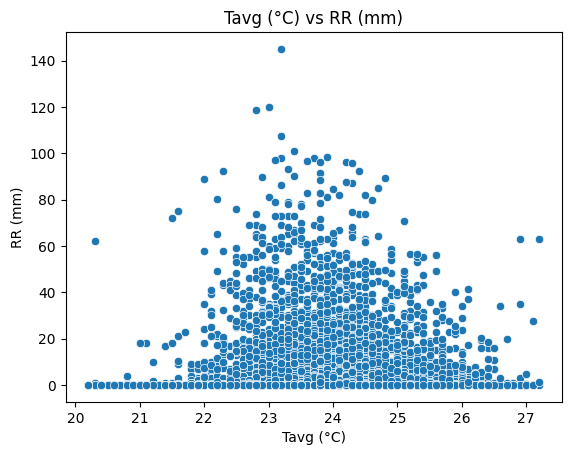

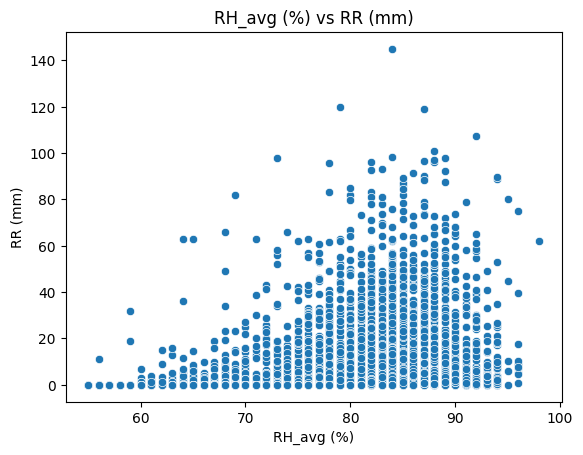

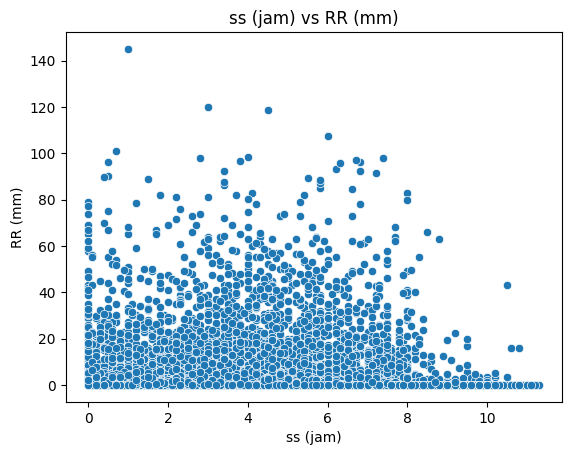

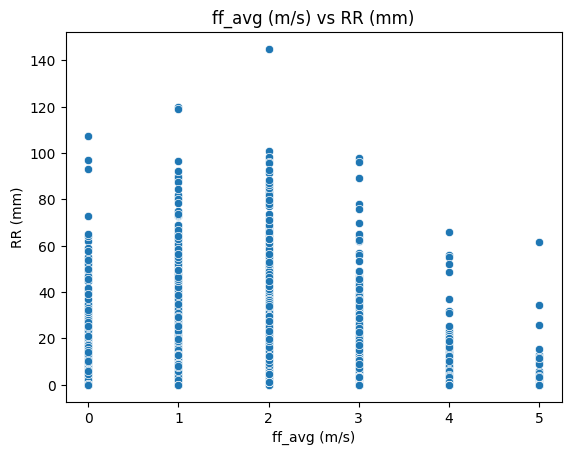

In [9]:
# Menampilkan scatter plot untuk semua fitur terhadap RR
import matplotlib.pyplot as plt
import seaborn as sns
for feature in features:
    sns.scatterplot(data=data, x=feature, y='RR (mm)')
    plt.title(f'{feature} vs RR (mm)')
    plt.show()

# Menghapus fitur yang kurang berkorelasi 'ss' and 'ff_avg'
data = data.drop(columns=[ 'Tanggal','ss (jam)', 'ff_avg (m/s)',])

# Menyimpan data final ke Google Drive
final_data_path = '/content/drive/MyDrive/RainfallsPrediction/data/processed/final_data.csv'
data.to_csv(final_data_path, index=False)

In [10]:
# Path ke file CSV di Google Drive
final_data_path = '/content/drive/MyDrive/RainfallsPrediction/data/processed/final_data.csv'

# Memuat data dari file CSV
data = pd.read_csv(final_data_path)

# Menampilkan data
data

,Tavg (°C),RH_avg (%),RR (mm)
0,24.1,69.0,82.0
1,22.9,77.0,0.0
2,23.8,78.0,14.0
3,24.2,77.0,10.0
4,23.4,78.0,0.0
...,...,...,...
8760,25.9,78.0,25.3
8761,25.4,86.0,29.3
8762,27.1,79.0,27.5
8763,26.1,82.0,1.4


In [11]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_columns = ['Tavg (°C)', 'RH_avg (%)', 'RR (mm)']
data[feature_columns] = scaler.fit_transform(data[feature_columns])
data.head(7)


,Tavg (°C),RH_avg (%),RR (mm)
0,0.557143,0.325581,0.565517
1,0.385714,0.511628,0.000000
2,0.514286,0.534884,0.096552
3,0.571429,0.511628,0.068966
4,0.457143,0.534884,0.000000
5,0.542857,0.581395,0.013793
6,0.385714,0.581395,0.027586


In [12]:
# Definisikan jumlah timestep
timesteps = 7

# Fungsi untuk membuat dataset baru dengan lagging berdasarkan timestep
def create_lagged_features(data, timesteps):
    X, y = [], []
    # Loop untuk membuat fitur lagging
    for i in range(len(data) - timesteps):
        # Membuat data input (X) dengan ukuran timestep
        X.append(data[i:(i + timesteps), :])
        # Menentukan target output (y), dalam hal ini curah hujan (RR (mm))
        y.append(data[i + timesteps, -1])  # Target adalah curah hujan (RR (mm))
    return np.array(X), np.array(y)

# Pilih kolom fitur yang akan dilagging, termasuk curah hujan (RR (mm))
features = data[['Tavg (°C)', 'RH_avg (%)', 'RR (mm)']].values

# Buat fitur lagged berdasarkan timestep yang telah ditentukan
X, y = create_lagged_features(features, timesteps)


In [13]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (8758, 7, 3)
Shape of y: (8758,)


In [14]:
from sklearn.model_selection import train_test_split
# Pisahkan data menjadi training (80%) dan temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
# Pisahkan temporary menjadi validation (10%) dan test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [15]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7006, 7, 3)
Shape of y_train: (7006,)
Shape of X_val: (876, 7, 3)
Shape of y_val: (876,)
Shape of X_test: (876, 7, 3)
Shape of y_test: (876,)


In [16]:
import numpy as np
import pandas as pd

# Misalkan X_test sudah ada
# Reshape data menjadi bentuk (sequence, timesteps * features)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
X_test_df = pd.DataFrame(X_test_flattened, columns=[f'Feature_{i}' for i in range(X_test_flattened.shape[1])])

# Simpan ke CSV
X_test_df.to_csv('X_test.csv', index=False)


**Perancangan model**

In [17]:
# === PERANCANGAN MODEL LSTM DENGAN MEKANISME ATTENTION BAHDANAU ===
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# Custom Bahdanau Attention Layer
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        # query: (batch_size, seq_len, hidden)
        # values: (batch_size, seq_len, hidden)
        score = self.V(tf.nn.tanh(self.W1(query) + self.W2(values)))  # (batch_size, seq_len, 1)
        attention_weights = tf.nn.softmax(score, axis=1)  # (batch_size, seq_len, 1)
        context_vector = attention_weights * values  # (batch_size, seq_len, hidden)
        context_vector = tf.reduce_sum(context_vector, axis=1)  # (batch_size, hidden)
        return context_vector

# Model Builder Function
def build_model(activation_function='relu'):
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))  # Shape: (time_steps, features)

    # LSTM Layers
    x = LSTM(256, activation=activation_function, return_sequences=True)(inputs)
    x = Dropout(0.3)(x)
    x = LSTM(256, activation=activation_function, return_sequences=True)(x)
    x = Dropout(0.3)(x)

    # Bahdanau Attention
    context_vector = BahdanauAttention(units=128)(x, x)  # query = x, values = x

    # Dense layers
    dense = Dense(128, activation='relu')(context_vector)
    dense = Dropout(0.3)(dense)
    dense = Dense(64, activation='relu')(dense)
    dense = Dropout(0.3)(dense)

    # Output
    output = Dense(1, activation='linear', name='rainfall')(dense)

    # Compile Model
    model = Model(inputs=inputs, outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss='mean_squared_error',
        metrics=['mean_squared_error']
    )

    return model


**Training Model**

In [18]:
# === TRAINING MODEL DENGAN ATTENTION BAHDANAU (dengan evaluasi data testing) ===
import os
import numpy as np
import pandas as pd
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model

# Mount Google Drive
drive.mount('/content/drive')

# Buat folder penyimpanan
folder_path = '/content/drive/MyDrive/RainfallsPrediction/models'
os.makedirs(folder_path, exist_ok=True)

# Parameter eksperimen
activation_function = 'relu'
batch_sizes = [4, 16, 32, 64, 128]
epochs_list = [10, 20, 50, 100]

# Menyimpan hasil training termasuk testing
results_df = pd.DataFrame(columns=[
    'Activation', 'Batch Size', 'Epochs',
    'Train MSE', 'Train RMSE',
    'Validation MSE', 'Validation RMSE',
    'Test MSE', 'Test RMSE'
])
histories = {}

# Mulai training kombinasi parameter
for batch_size in batch_sizes:
    for epochs in epochs_list:
        try:
            print(f"\n[INFO] Training: activation={activation_function}, batch_size={batch_size}, epochs={epochs}")

            # Path model & history
            model_name = f"best_model_{activation_function}_bs{batch_size}_ep{epochs}.keras"
            save_path = os.path.join(folder_path, model_name)
            history_path = save_path.replace('.keras', '.csv')

            if os.path.exists(save_path) and os.path.exists(history_path):
                print("[INFO] Model & history sudah ada, memuat ulang...")
                model = load_model(save_path, compile=False)
                model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mean_squared_error', metrics=['mean_squared_error'])
                history_dict = pd.read_csv(history_path).to_dict(orient='list')
                history = tf.keras.callbacks.History()
                history.history = history_dict
                histories[f'{activation_function}_{batch_size}_{epochs}'] = history
            else:
                print("[INFO] Melatih model baru...")
                model = build_model(activation_function)
                model.summary()
                checkpoint = ModelCheckpoint(save_path, monitor='val_loss', save_best_only=True, verbose=1, mode='min')
                scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)
                early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

                history = model.fit(
                    X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, scheduler, early_stop],
                    verbose=0
                )

                pd.DataFrame(history.history).to_csv(history_path, index=False)
                histories[f'{activation_function}_{batch_size}_{epochs}'] = history

            # Evaluasi Train, Validation, dan Testing
            train_mse = model.evaluate(X_train, y_train, verbose=0)[1]
            val_mse = model.evaluate(X_val, y_val, verbose=0)[1]
            test_mse = model.evaluate(X_test, y_test, verbose=0)[1]
            train_rmse = np.sqrt(train_mse)
            val_rmse = np.sqrt(val_mse)
            test_rmse = np.sqrt(test_mse)

            # Simpan hasil evaluasi
            result = pd.DataFrame({
                'Activation': [activation_function],
                'Batch Size': [batch_size],
                'Epochs': [epochs],
                'Train MSE': [train_mse],
                'Train RMSE': [train_rmse],
                'Validation MSE': [val_mse],
                'Validation RMSE': [val_rmse],
                'Test MSE': [test_mse],
                'Test RMSE': [test_rmse]
            })
            results_df = pd.concat([results_df, result], ignore_index=True)
            results_df.to_csv(os.path.join(folder_path, 'training_results.csv'), index=False)
            print("[✓] Hasil disimpan.")

        except Exception as e:
            print(f"[ERROR] {e}")
            results_df.to_csv(os.path.join(folder_path, 'training_results.csv'), index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

[INFO] Training: activation=relu, batch_size=4, epochs=10
[INFO] Model & history sudah ada, memuat ulang...


<ipython-input-18-3385308465>:90: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, result], ignore_index=True)


[✓] Hasil disimpan.

[INFO] Training: activation=relu, batch_size=4, epochs=20
[INFO] Model & history sudah ada, memuat ulang...
[✓] Hasil disimpan.

[INFO] Training: activation=relu, batch_size=4, epochs=50
[INFO] Model & history sudah ada, memuat ulang...
[✓] Hasil disimpan.

[INFO] Training: activation=relu, batch_size=4, epochs=100
[INFO] Model & history sudah ada, memuat ulang...
[✓] Hasil disimpan.

[INFO] Training: activation=relu, batch_size=16, epochs=10
[INFO] Model & history sudah ada, memuat ulang...
[✓] Hasil disimpan.

[INFO] Training: activation=relu, batch_size=16, epochs=20
[INFO] Model & history sudah ada, memuat ulang...
[✓] Hasil disimpan.

[INFO] Training: activation=relu, batch_size=16, epochs=50
[INFO] Model & history sudah ada, memuat ulang...
[✓] Hasil disimpan.

[INFO] Training: activation=relu, batch_size=16, epochs=100
[INFO] Model & history sudah ada, memuat ulang...
[✓] Hasil disimpan.

[INFO] Training: activation=relu, batch_size=32, epochs=10
[INFO] Mode

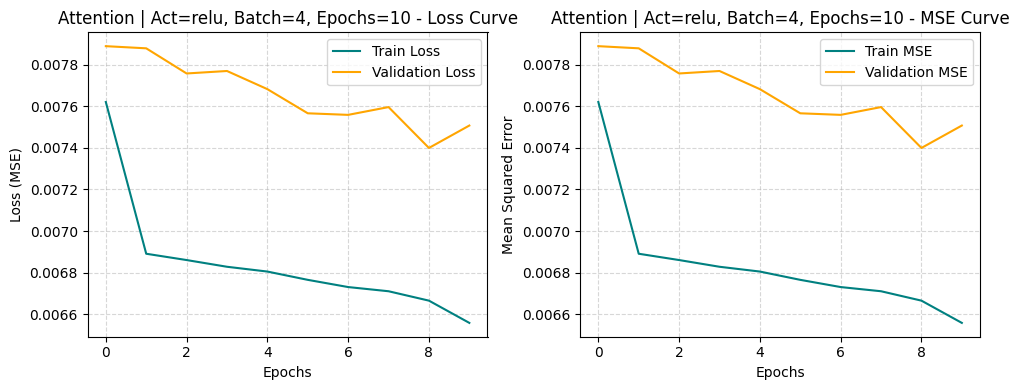

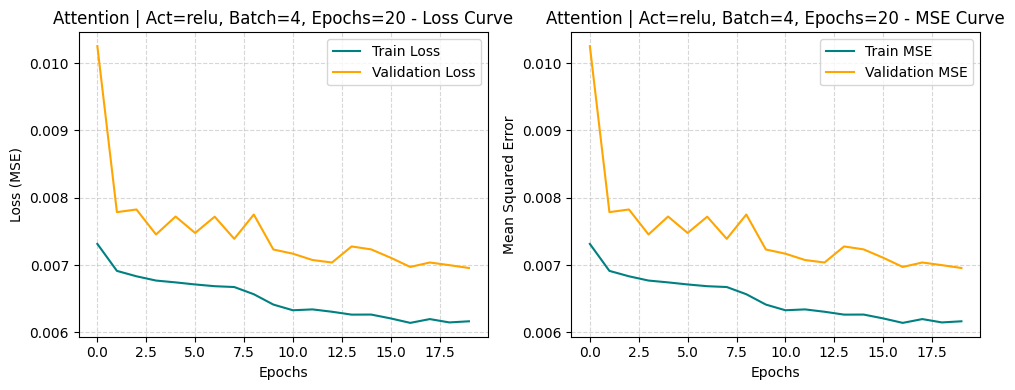

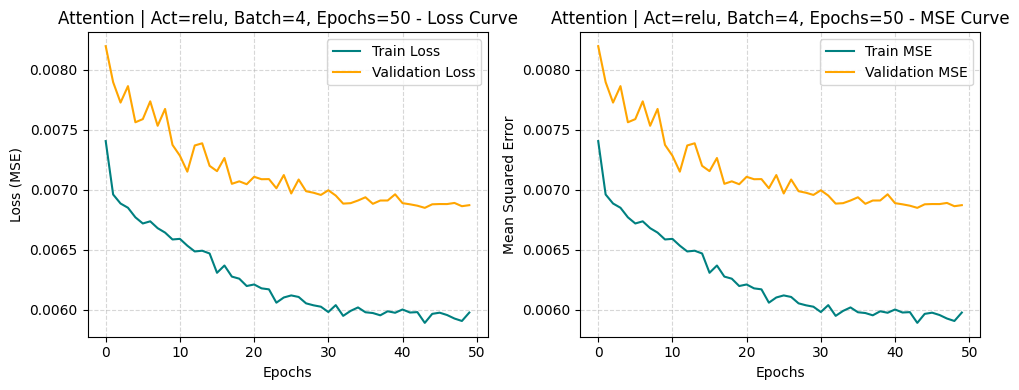

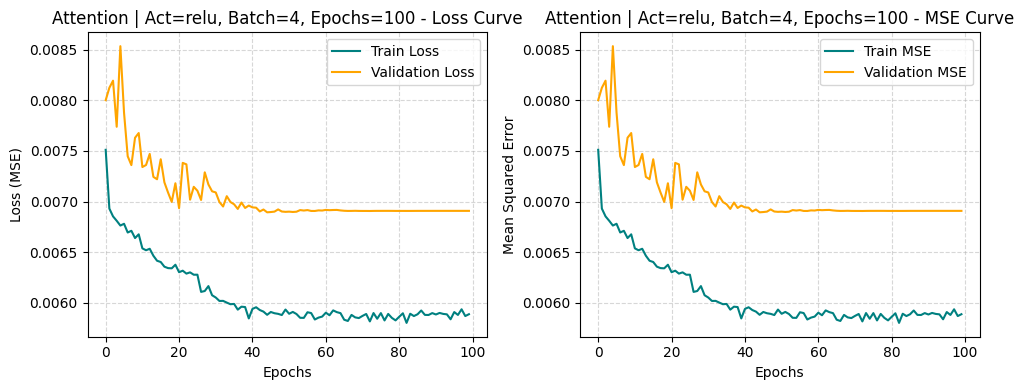

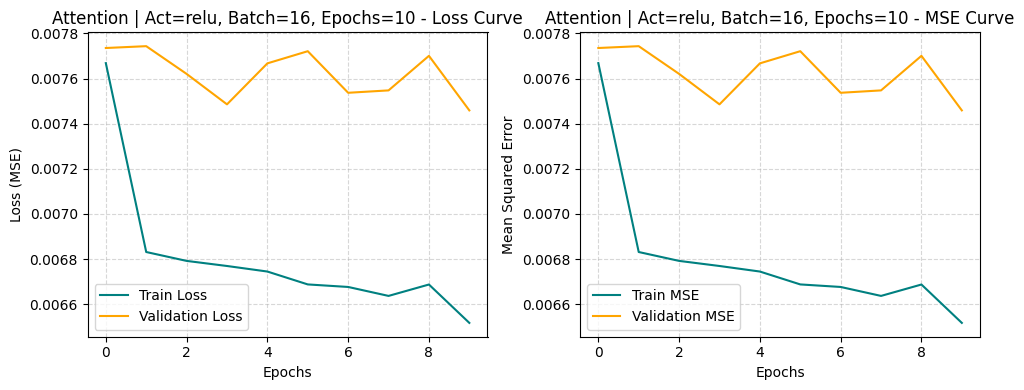

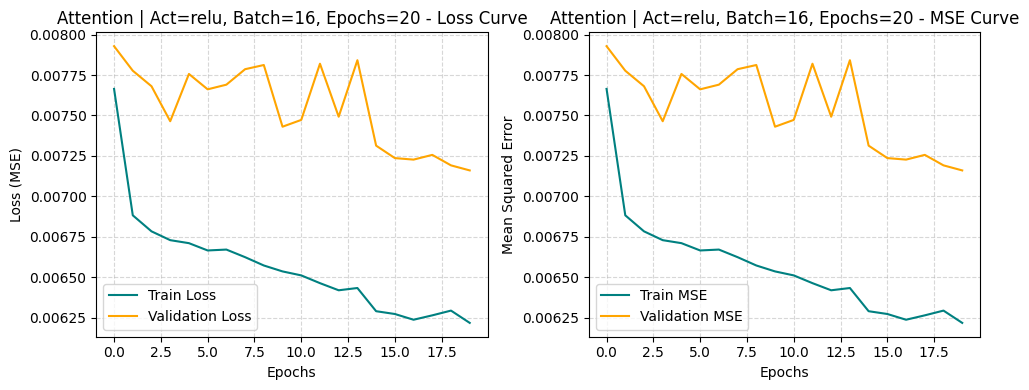

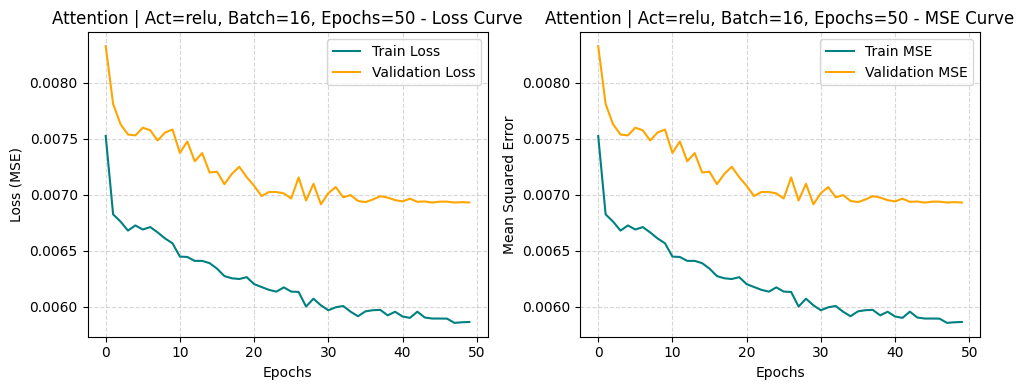

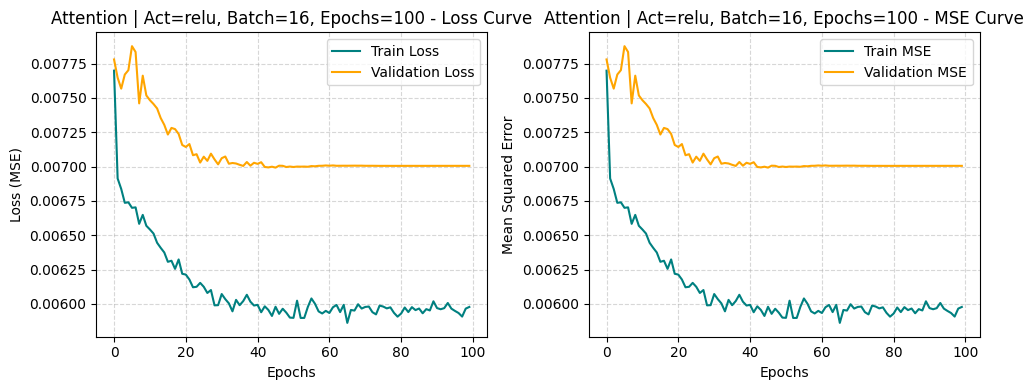

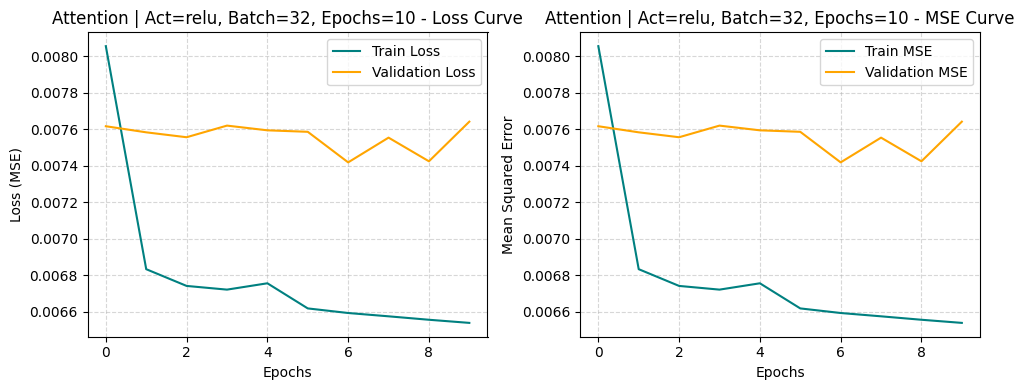

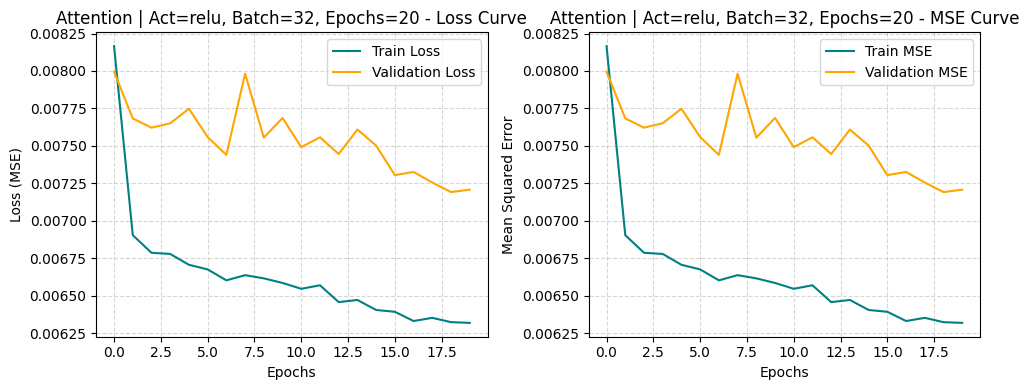

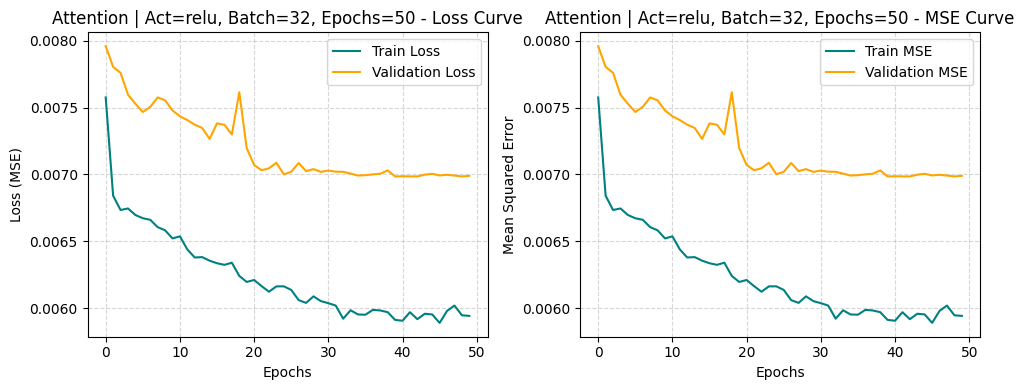

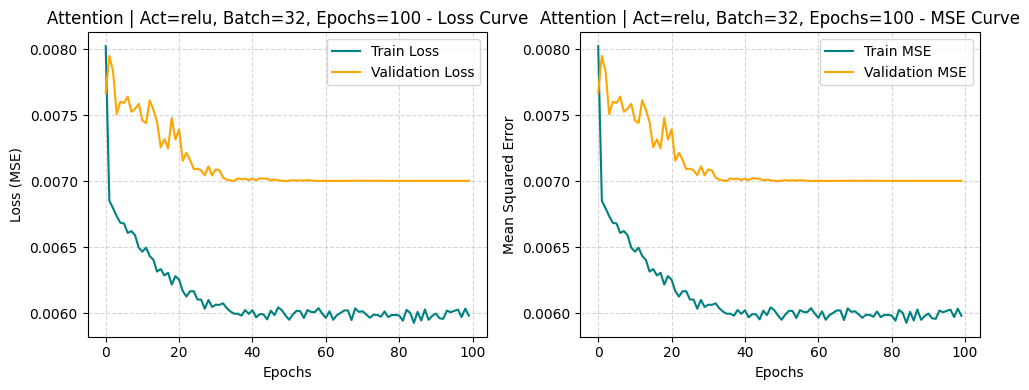

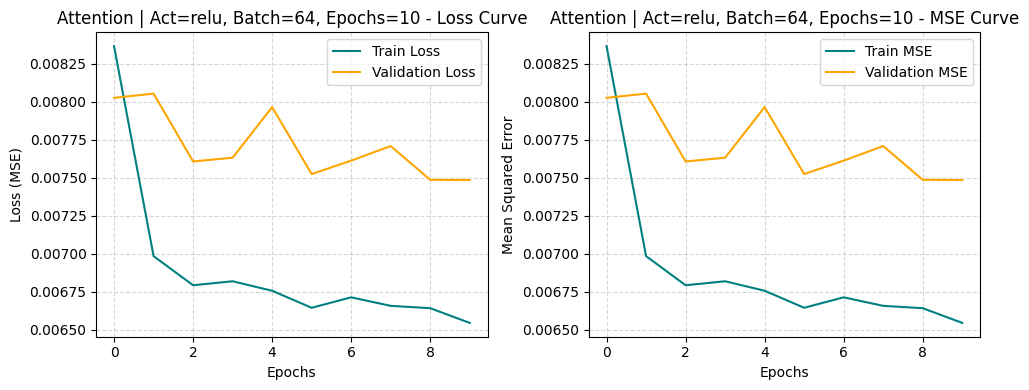

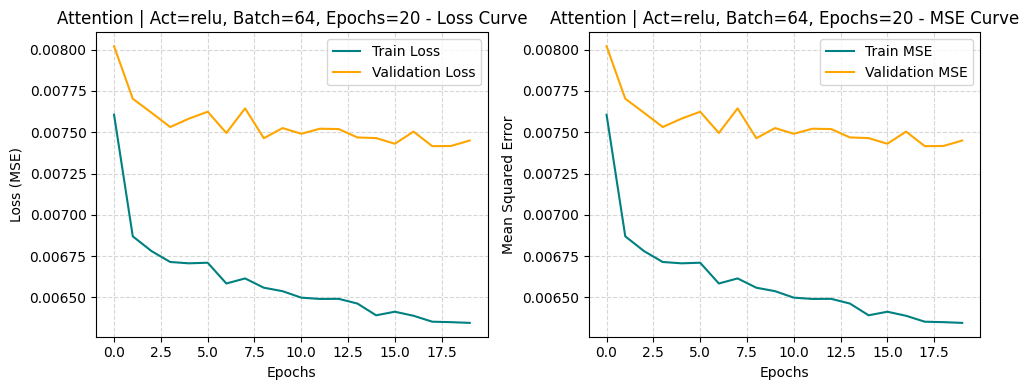

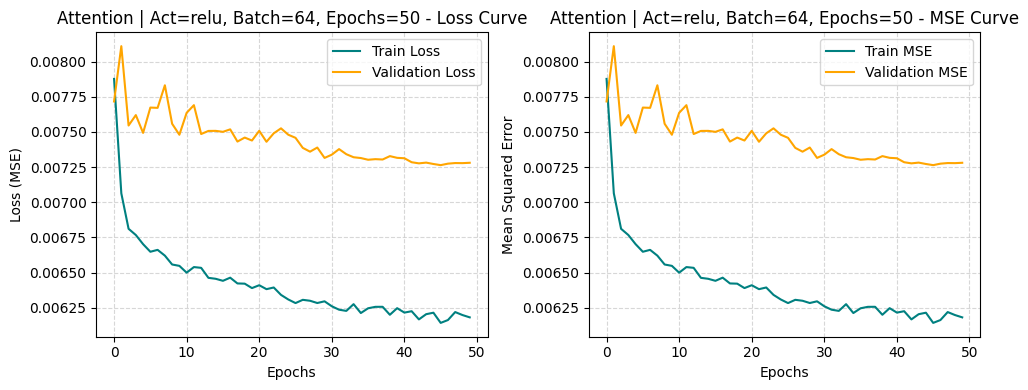

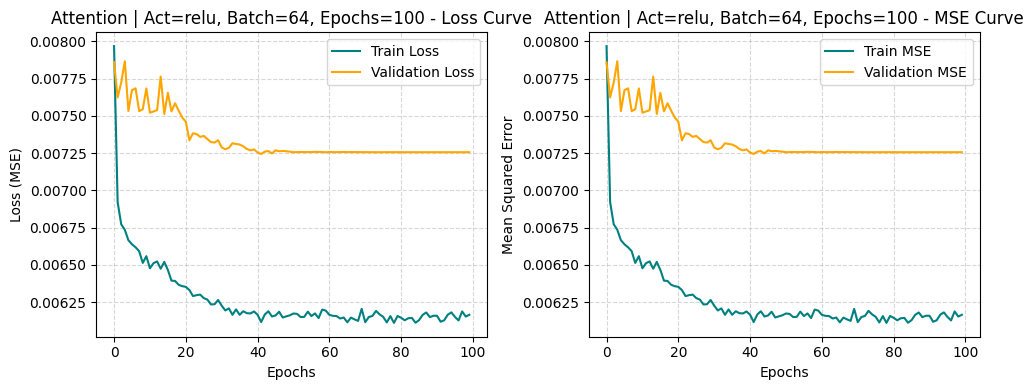

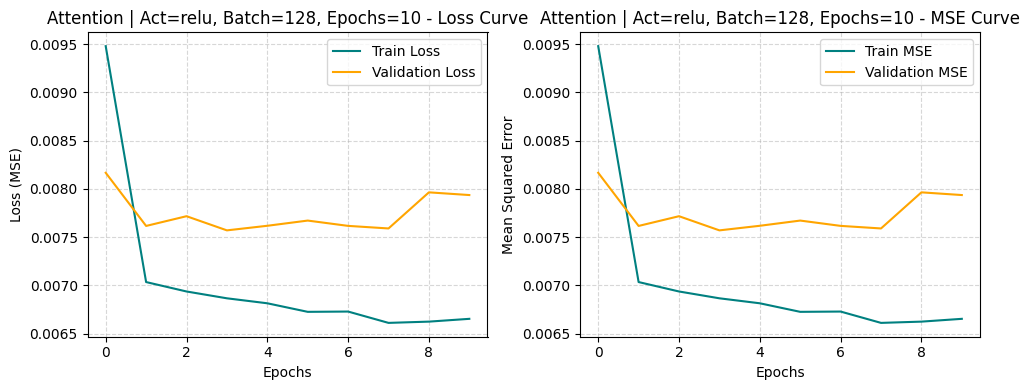

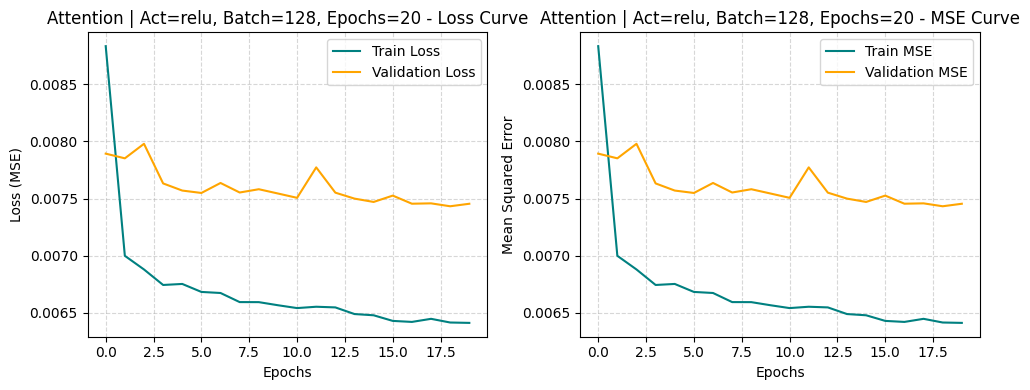

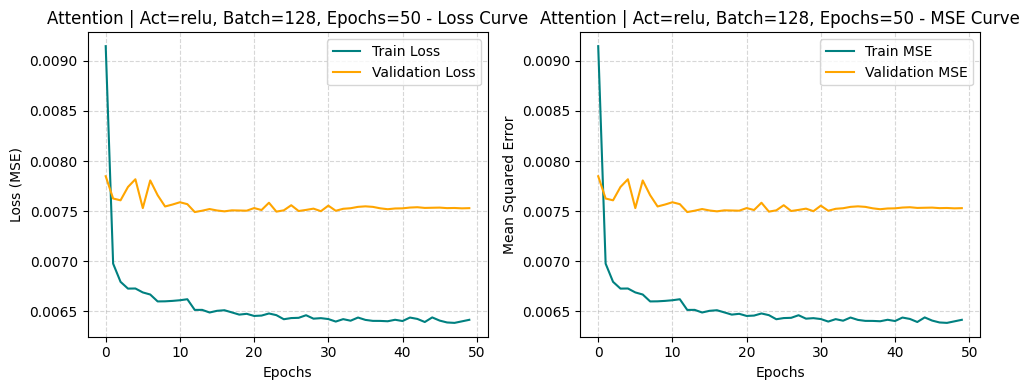

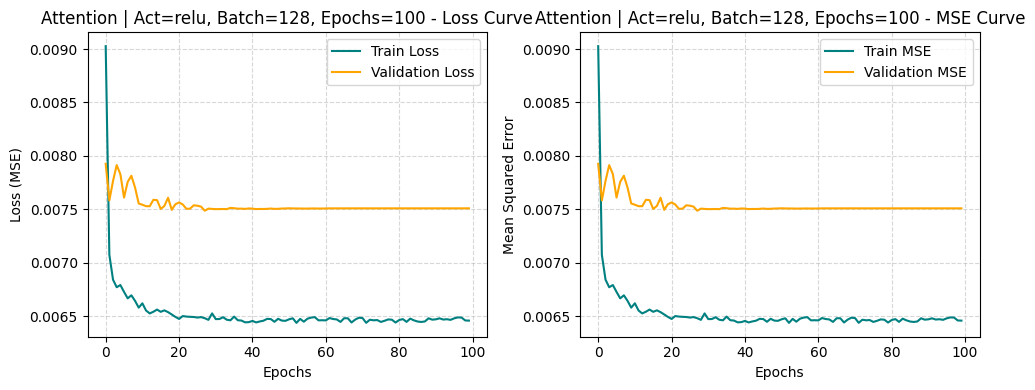

In [19]:
import matplotlib.pyplot as plt

def visualize_training(history, title="Training Model Attention"):
    plt.figure(figsize=(10, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='teal')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title(f'{title} - Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # Plot MSE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_squared_error'], label='Train MSE', color='teal')
    plt.plot(history.history['val_mean_squared_error'], label='Validation MSE', color='orange')
    plt.title(f'{title} - MSE Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# Visualisasi semua kombinasi parameter
for key, history in histories.items():
    activation_function, batch_size, epochs = key.split('_')
    title = f"Attention | Act={activation_function}, Batch={batch_size}, Epochs={epochs}"
    visualize_training(history, title)


In [20]:
# Menampilkan hasil untuk setiap kombinasi parameter
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
import numpy as np

print("=== Hasil Evaluasi Model LSTM dengan Mekanisme Attention (Bahdanau) ===\n")

for i in range(len(results_df)):
    try:
        # Ambil informasi parameter model
        activation = results_df['Activation'][i]
        batch_size = results_df['Batch Size'][i]
        epochs = results_df['Epochs'][i]

        print(f"[Model ke-{i+1}]")
        print(f"  Activation Function : {activation}")
        print(f"  Batch Size          : {batch_size}")
        print(f"  Epochs              : {epochs}")

        # Path ke model
        model_path = f"/content/drive/MyDrive/RainfallsPrediction/models/best_model_{activation}_bs{batch_size}_ep{epochs}.keras"
        model = load_model(model_path)

        # Evaluasi ulang pada data training
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)

        # Evaluasi ulang pada data validasi
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_rmse = np.sqrt(val_mse)

        # Evaluasi pada data testing
        y_test_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        # Tampilkan hasil
        print(f"  Train MSE           : {train_mse:.6f}")
        print(f"  Train RMSE          : {train_rmse:.6f}")
        print(f"  Validation MSE      : {val_mse:.6f}")
        print(f"  Validation RMSE     : {val_rmse:.6f}")
        print(f"  Test MSE            : {test_mse:.6f}")
        print(f"  Test RMSE           : {test_rmse:.6f}")
        print("-" * 60)

    except Exception as e:
        print(f"[ERROR on model ke-{i+1}] {e}")
        print("-" * 60)


=== Hasil Evaluasi Model LSTM dengan Mekanisme Attention (Bahdanau) ===

[Model ke-1]
  Activation Function : relu
  Batch Size          : 4
  Epochs              : 10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
  Train MSE           : 0.006307
  Train RMSE          : 0.079419
  Validation MSE      : 0.007399
  Validation RMSE     : 0.086018
  Test MSE            : 0.008543
  Test RMSE           : 0.092430
------------------------------------------------------------
[Model ke-2]
  Activation Function : relu
  Batch Size          : 4
  Epochs              : 20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  Train MSE           : 0.005915
  Train RMSE          : 0.076908
  Validation MSE      : 0.006956
  Validation RMSE     : 0.083403
  Test MSE            : 0.008161
  Test RMSE           : 0.090339
----------------------------------------

In [21]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model
import numpy as np
import os

# Menentukan model terbaik berdasarkan Validation MSE
best_index = results_df['Validation MSE'].idxmin()
best_result = results_df.loc[best_index]

# Ambil parameter dari model terbaik
best_activation = str(best_result['Activation'])
best_batch_size = int(best_result['Batch Size'])
best_epochs = int(best_result['Epochs'])

# Path ke model terbaik
best_model_filename = f"best_model_{best_activation}_bs{best_batch_size}_ep{best_epochs}.keras"
best_model_path = os.path.join("/content/drive/MyDrive/RainfallsPrediction/models", best_model_filename)

# Load model terbaik
best_model = load_model(best_model_path)

# Evaluasi ulang pada data test
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Tampilkan hasil evaluasi lengkap
print("=== Model LSTM Attention Bahdanau Terbaik Berdasarkan Validation MSE ===")
print(f"  Activation Function : {best_activation}")
print(f"  Batch Size          : {best_batch_size}")
print(f"  Epochs              : {best_epochs}")
print(f"  Train MSE           : {best_result['Train MSE']:.6f}")
print(f"  Train RMSE          : {best_result['Train RMSE']:.6f}")
print(f"  Validation MSE      : {best_result['Validation MSE']:.6f}")
print(f"  Validation RMSE     : {best_result['Validation RMSE']:.6f}")
print(f"  Test MSE            : {test_mse:.6f}")
print(f"  Test RMSE           : {test_rmse:.6f}")
print("=" * 60)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
=== Model LSTM Attention Bahdanau Terbaik Berdasarkan Validation MSE ===
  Activation Function : relu
  Batch Size          : 4
  Epochs              : 50
  Train MSE           : 0.005754
  Train RMSE          : 0.075854
  Validation MSE      : 0.006849
  Validation RMSE     : 0.082757
  Test MSE            : 0.008007
  Test RMSE           : 0.089480


In [22]:
from tensorflow.keras.models import load_model

# Pastikan nilai dikonversi ke format string dan integer jika diperlukan
best_activation = str(best_result['Activation'])
best_batch_size = int(best_result['Batch Size'])
best_epochs = int(best_result['Epochs'])

# Bangun path model terbaik
best_model_filename = f"best_model_{best_activation}_bs{best_batch_size}_ep{best_epochs}.keras"
best_model_path = os.path.join(folder_path, best_model_filename)

# Load model terbaik
try:
    best_model = load_model(best_model_path)
    print(f"✅ Model terbaik berhasil dimuat dari:\n{best_model_path}")
except Exception as e:
    print(f"❌ Gagal memuat model terbaik: {e}")


✅ Model terbaik berhasil dimuat dari:
/content/drive/MyDrive/RainfallsPrediction/models/best_model_relu_bs4_ep50.keras


In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
import os

# Ambil 5 model terbaik berdasarkan Validation MSE
top_5_results = results_df.sort_values(by='Validation MSE').head(5).reset_index(drop=True)

print("Top 5 best models based on Validation MSE:")
print(top_5_results[['Activation', 'Batch Size', 'Epochs', 'Train MSE', 'Train RMSE', 'Validation MSE', 'Validation RMSE']])

# List untuk menyimpan hasil evaluasi ulang
eval_results = []

print("\nEvaluasi ulang model terbaik pada data training, validasi, dan testing:")

for i, row in top_5_results.iterrows():
    # Ambil parameter
    activation = str(row['Activation'])
    batch_size = int(row['Batch Size'])
    epochs = int(row['Epochs'])

    # Buat path ke model
    model_filename = f"best_model_{activation}_bs{batch_size}_ep{epochs}.keras"
    model_path = os.path.join("/content/drive/MyDrive/RainfallsPrediction/models", model_filename)

    # Load model
    model = load_model(model_path)

    # Evaluasi training
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)

    # Evaluasi validasi
    y_val_pred = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mse_val)

    # Evaluasi testing
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    print(f"\nModel {i+1}: Activation={activation}, Batch={batch_size}, Epochs={epochs}")
    print(f"  Training MSE (recalculated)    : {mse_train:.6f}")
    print(f"  Training RMSE (recalculated)   : {rmse_train:.6f}")
    print(f"  Validation MSE (recalculated)  : {mse_val:.6f}")
    print(f"  Validation RMSE (recalculated) : {rmse_val:.6f}")
    print(f"  Testing MSE (recalculated)     : {mse_test:.6f}")
    print(f"  Testing RMSE (recalculated)    : {rmse_test:.6f}")

    # Simpan ke list
    eval_results.append({
        'Model Rank': i+1,
        'Activation': activation,
        'Batch Size': batch_size,
        'Epochs': epochs,
        'Train MSE (recalculated)': mse_train,
        'Train RMSE (recalculated)': rmse_train,
        'Validation MSE (recalculated)': mse_val,
        'Validation RMSE (recalculated)': rmse_val,
        'Test MSE (recalculated)': mse_test,
        'Test RMSE (recalculated)': rmse_test
    })

# Simpan evaluasi ke DataFrame
eval_df = pd.DataFrame(eval_results)

# Simpan ke CSV
save_path = "/content/drive/MyDrive/RainfallsPrediction/models/top_5_models_evaluation.csv"
eval_df.to_csv(save_path, index=False)

print(f"\n✅ Hasil evaluasi 5 model terbaik (Train, Validation, Test) telah disimpan ke:\n{save_path}")


Top 5 best models based on Validation MSE:
  Activation Batch Size Epochs  Train MSE  Train RMSE  Validation MSE  \
0       relu          4     50   0.005754    0.075854        0.006849   
1       relu          4    100   0.005693    0.075454        0.006894   
2       relu         16     50   0.005786    0.076064        0.006915   
3       relu          4     20   0.005915    0.076908        0.006956   
4       relu         32     50   0.005793    0.076110        0.006985   

   Validation RMSE  
0         0.082757  
1         0.083031  
2         0.083155  
3         0.083403  
4         0.083575  

Evaluasi ulang model terbaik pada data training, validasi, dan testing:
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Model 1: Activation=relu, Batch=4, Epochs=50
  Training MSE (recalculated)    : 0.005754
  Training RMSE (recalculated)   : 0.075854
  Validation MSE (recalculated)  : 0.006849
  Validation RMSE (re

**Uji coba Model**

Loading best model from /content/drive/MyDrive/RainfallsPrediction/models/best_model_relu_bs4_ep50.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
Test MSE: 0.00800674114895657
Test RMSE: 0.0894803953330369


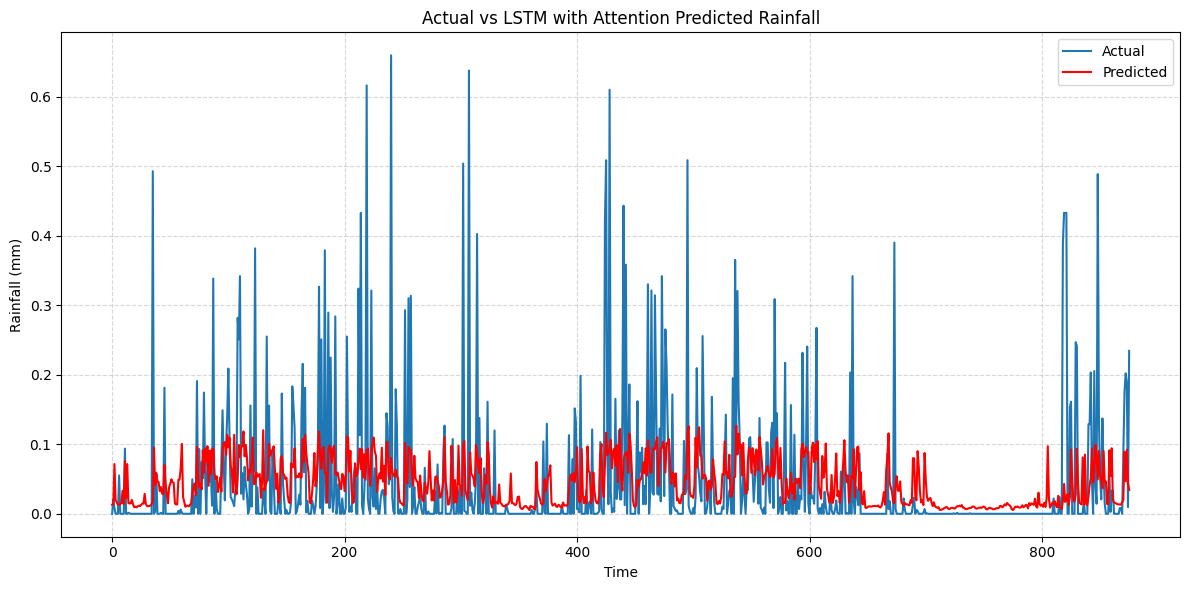

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Pastikan best_model_path sudah didefinisikan dari model terbaik hasil training Attention Bahdanau
print(f"Loading best model from {best_model_path}")
best_model = load_model(best_model_path)

# Evaluasi model pada data uji
y_test_pred = best_model.predict(X_test)

# Hitung MSE dan RMSE
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")

# Visualisasi hasil prediksi vs data aktual
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test.flatten(), label='Actual')
plt.plot(range(len(y_test_pred)), y_test_pred.flatten(), label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.title('Actual vs LSTM with Attention Predicted Rainfall')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


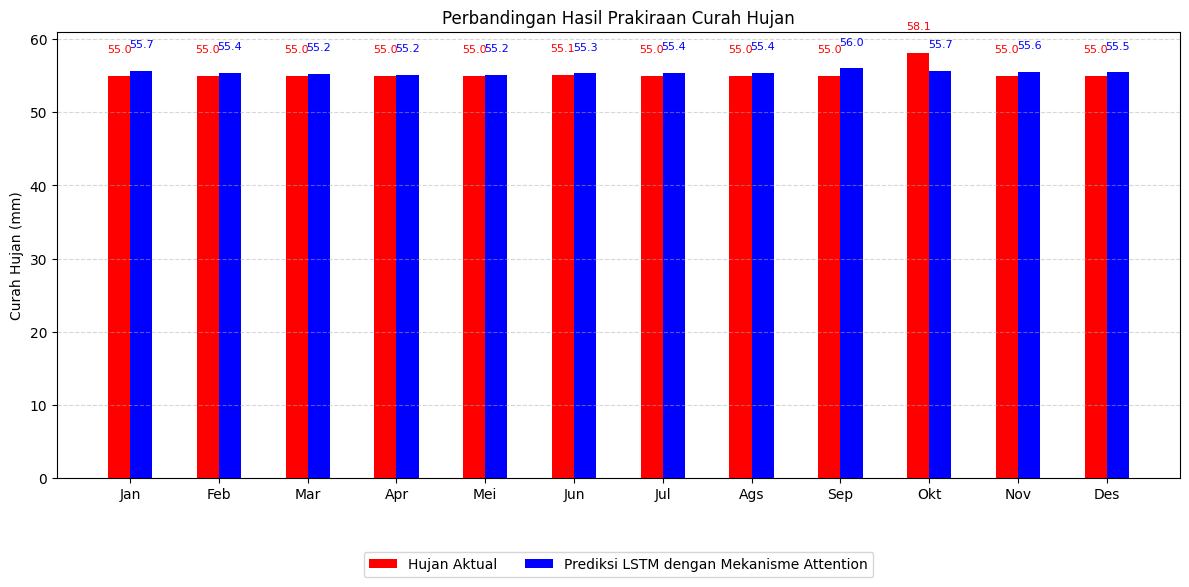

Hujan Aktual (12 bulan terakhir): [55.         55.         55.         55.         55.         55.08896552
 55.         55.         55.         58.1137931  55.         55.        ]
Prediksi LSTM dengan Mekanisme Attention (12 bulan terakhir): [55.67034853 55.42995866 55.24173749 55.15488031 55.15556768 55.32182058
 55.43221378 55.41836085 55.99630127 55.66029224 55.57251167 55.48543023]


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Asumsi: y_val, y_pred, dan scaler sudah tersedia dari proses sebelumnya

# Pastikan y_val dan y_pred adalah array 1D
y_val = y_val.flatten()
y_pred = y_pred.flatten()

# Jumlah fitur saat scaler di-fit (misal 3 kolom)
n_features = 3
target_index = 1  # indeks kolom target

# Buat dummy array untuk inverse transform
y_val_dummy = np.zeros((len(y_val), n_features))
y_pred_dummy = np.zeros((len(y_pred), n_features))

# Isi kolom target dengan data y_val dan y_pred
y_val_dummy[:, target_index] = y_val
y_pred_dummy[:, target_index] = y_pred

# Inverse transform seluruh data dummy array
y_val_inverse_full = scaler.inverse_transform(y_val_dummy)
y_pred_inverse_full = scaler.inverse_transform(y_pred_dummy)

# Ambil hasil inverse transform pada kolom target
y_val_inverse = y_val_inverse_full[:, target_index]
y_pred_inverse = y_pred_inverse_full[:, target_index]

# Ambil 12 data terakhir untuk plotting
y_val_sample = y_val_inverse[-12:]
y_pred_sample = y_pred_inverse[-12:]

# Daftar bulan untuk sumbu x
bulan = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
x = np.arange(len(bulan))
width = 0.25

# Plot perbandingan hasil
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, y_val_sample, width, label='Hujan Aktual', color='red')
plt.bar(x + width/2, y_pred_sample, width, label='Prediksi LSTM dengan Mekanisme Attention', color='blue')

# Tambahkan label nilai di atas batang dengan offset dinamis
offset = 0.05 * max(max(y_val_sample), max(y_pred_sample))

for i, val in enumerate(y_val_sample):
    plt.text(x[i] - width/2, val + offset, f"{val:.1f}", ha='center', va='bottom', fontsize=8, color='red')

for i, val in enumerate(y_pred_sample):
    plt.text(x[i] + width/2, val + offset, f"{val:.1f}", ha='center', va='bottom', fontsize=8, color='blue')

plt.xticks(x, bulan)
plt.ylabel("Curah Hujan (mm)")
plt.title("Perbandingan Hasil Prakiraan Curah Hujan")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("Hujan Aktual (12 bulan terakhir):", y_val_sample)
print("Prediksi LSTM dengan Mekanisme Attention (12 bulan terakhir):", y_pred_sample)
